In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#importing the dataset
crop = pd.read_csv("Crop_Data.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
#copying original data
data = crop.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            900 non-null    int64  
 1   P            900 non-null    int64  
 2   K            900 non-null    int64  
 3   temperature  900 non-null    float64
 4   humidity     900 non-null    float64
 5   ph           900 non-null    float64
 6   rainfall     900 non-null    float64
 7   label        900 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 56.4+ KB


In [6]:
#checking for null values
data.isnull().sum().any()


False

In [7]:
#checking for unique values
for i in data.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype == 'object'):
        print('Unique values : ',pd.unique(data[i]))
    

column Name :  N
No. of unique values : 119 

column Name :  P
No. of unique values : 107 

column Name :  K
No. of unique values : 63 

column Name :  TEMPERATURE
No. of unique values : 900 

column Name :  HUMIDITY
No. of unique values : 900 

column Name :  PH
No. of unique values : 900 

column Name :  RAINFALL
No. of unique values : 900 

column Name :  LABEL
No. of unique values : 9 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'mothbeans' 'mungbean' 'banana'
 'mango' 'apple']


In [8]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order

In [9]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,8
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,8
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,8
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,8
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,8


In [10]:
#encoded labels for classes 
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

,encoded
label,
apple,0
banana,1
chickpea,2
kidneybeans,3
maize,4
mango,5
mothbeans,6
mungbean,7
rice,8


In [12]:
#fetching the label for given encoded value
a=7
for i in range(0,len(classes)):
    if(classes.encoded[i]==a):
        print(classes.index[i].upper())

MUNGBEAN


In [13]:
#dropping duplicate values
data = data.drop_duplicates()

<AxesSubplot:>

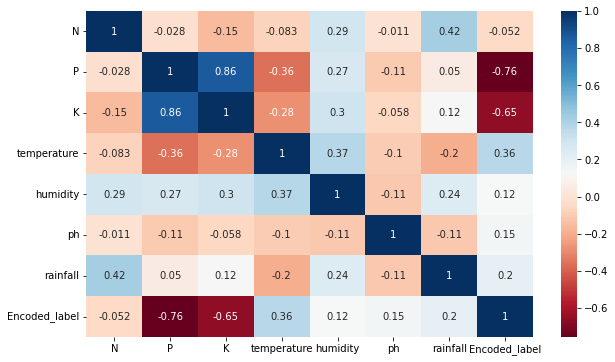

In [14]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

In [15]:
#EDA
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,Encoded_label
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,44.668889,63.338889,53.287778,24.778186,60.815482,6.332454,102.057247,4.000000
std,32.517016,30.235737,55.270037,4.429484,26.299075,0.939187,54.753988,2.583425
min,0.000000,15.000000,15.000000,15.330426,14.258040,3.504752,30.920140,0.000000
25%,20.000000,43.000000,21.000000,21.250816,45.558471,5.750170,68.539718,2.000000
50%,34.000000,57.000000,30.000000,24.912602,65.303845,6.191559,93.358765,4.000000
75%,74.000000,74.250000,53.000000,28.174664,83.316120,6.772664,110.989358,6.000000
max,120.000000,145.000000,205.000000,35.990097,94.920481,9.935091,298.560117,8.000000


Variable Name : N


C:\Users\97517\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


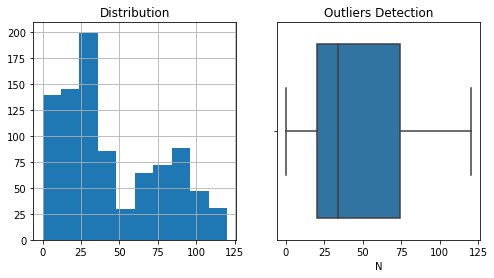



Variable Name : P


C:\Users\97517\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


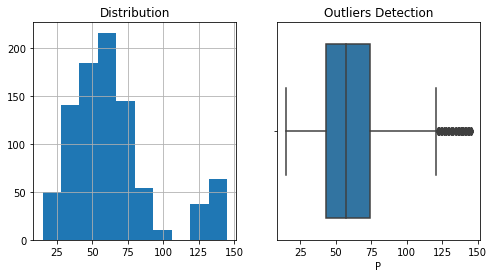



Variable Name : K


C:\Users\97517\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


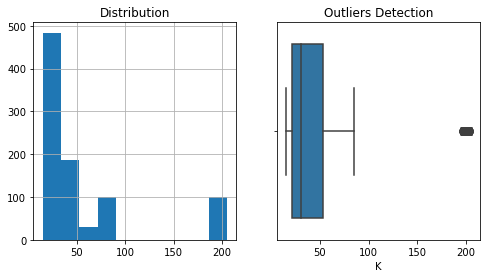



Variable Name : TEMPERATURE


C:\Users\97517\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


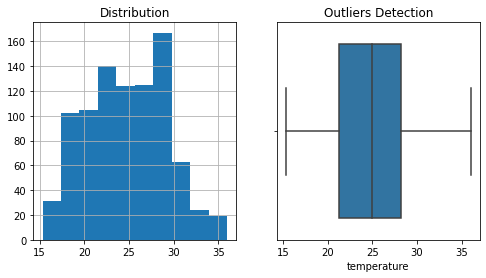



Variable Name : HUMIDITY


C:\Users\97517\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


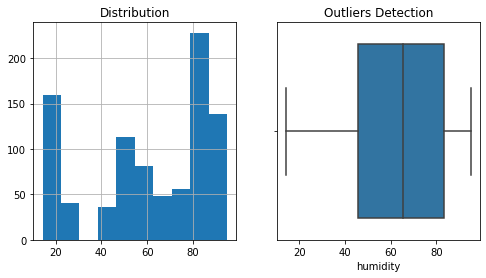



Variable Name : PH


C:\Users\97517\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


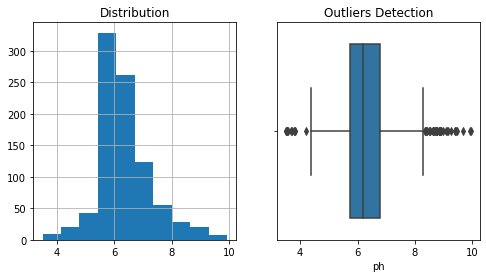



Variable Name : RAINFALL


C:\Users\97517\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


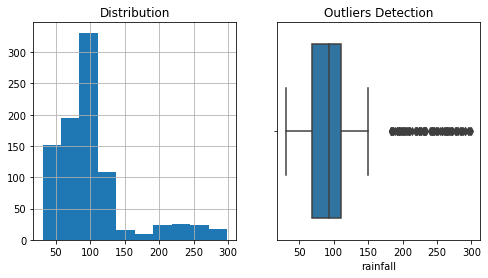

In [16]:
#checking for outliers in the data
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()
    print('\n')

Variable : N


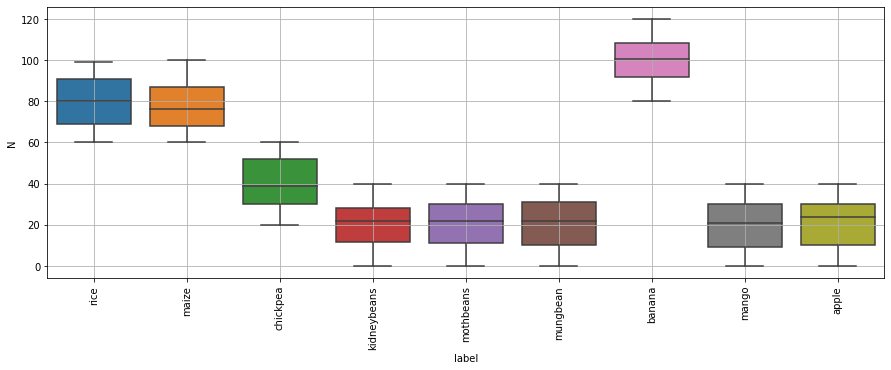

Variable : P


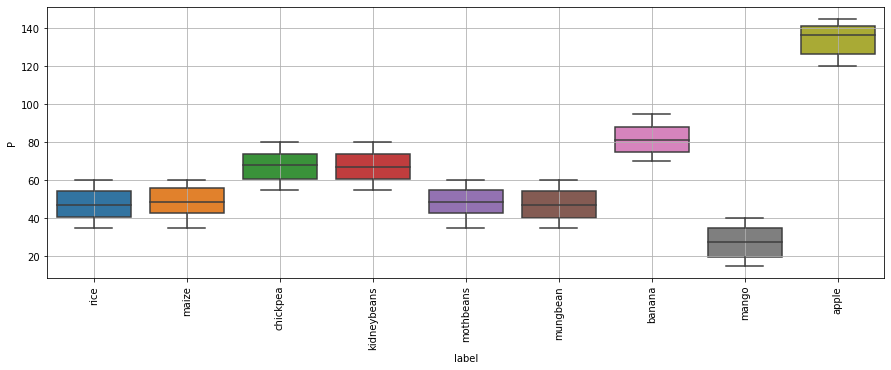

Variable : K


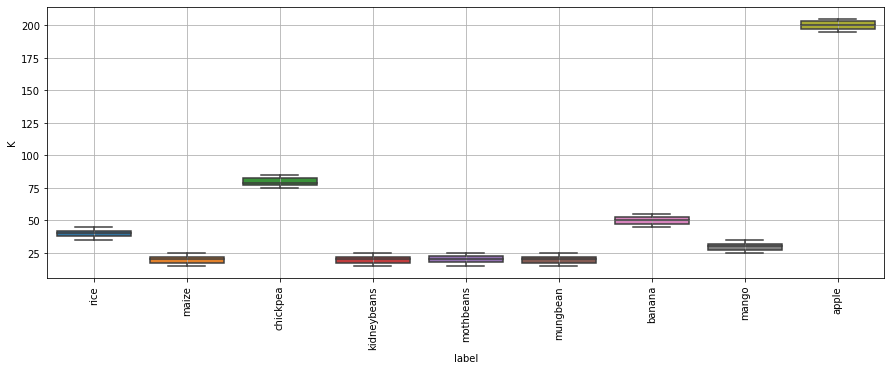

Variable : TEMPERATURE


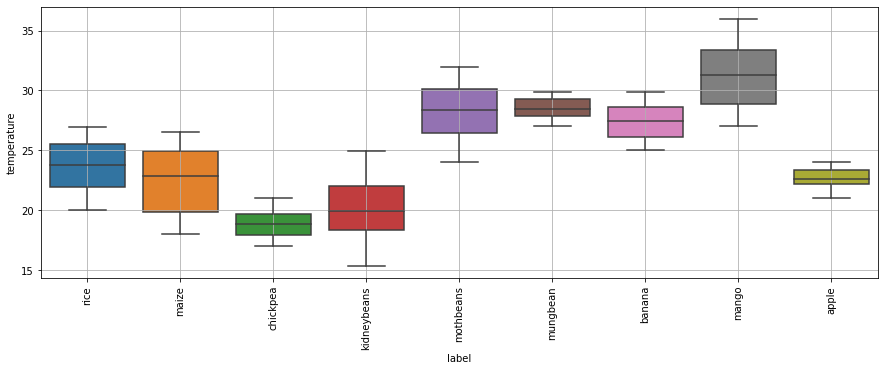

Variable : HUMIDITY


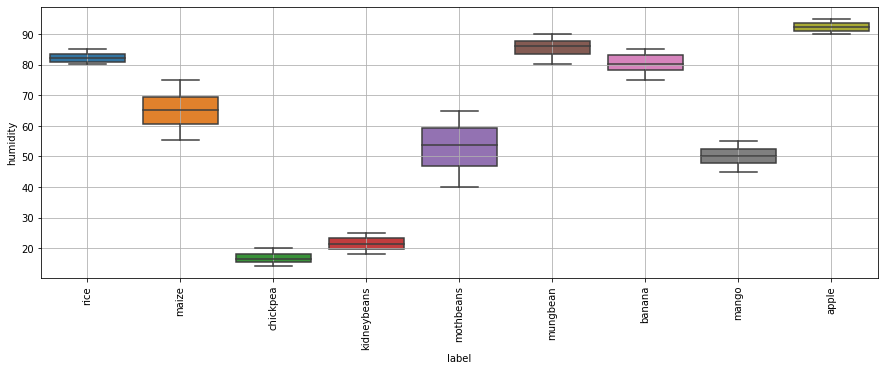

Variable : PH


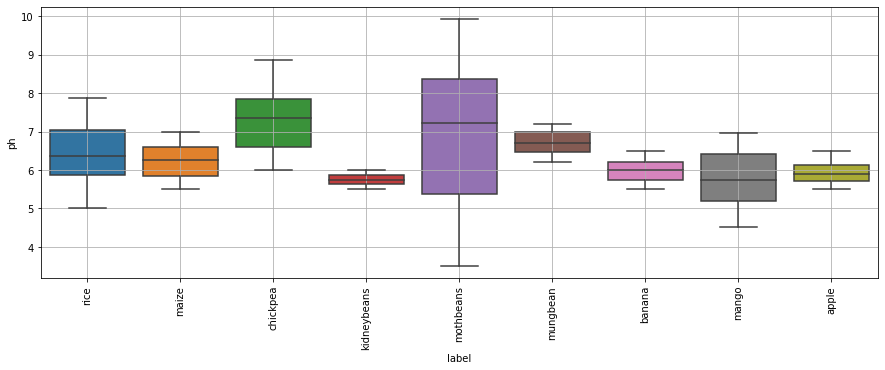

Variable : RAINFALL


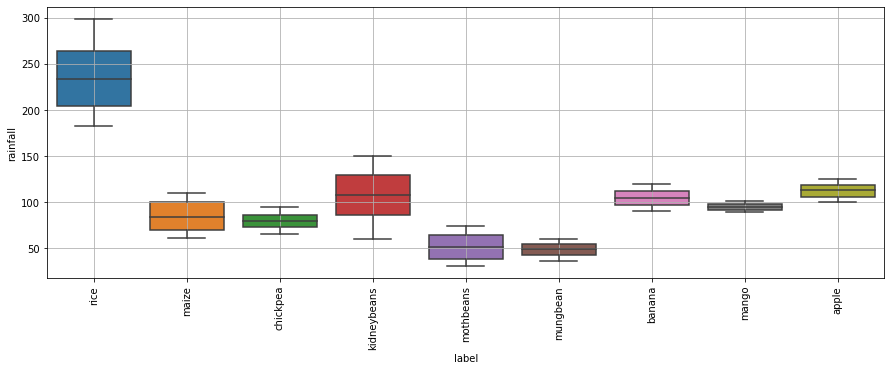

In [17]:
#plotting effect of input variable with output variable
for i in data.columns[:-2]:
    plt.figure(figsize=(15,5))
    print('Variable :',i.upper())
    sns.boxplot(x=data.label,y=data[i])
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

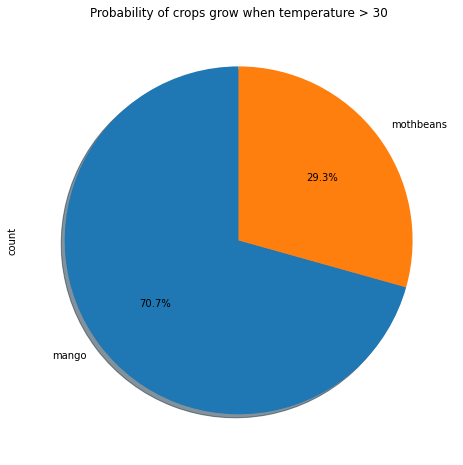

In [18]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(data.label[data.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

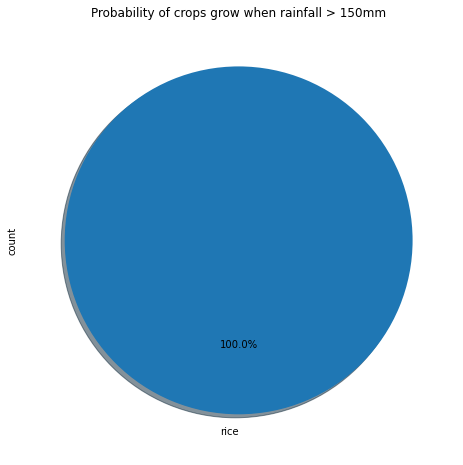

In [19]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(data.label[data.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

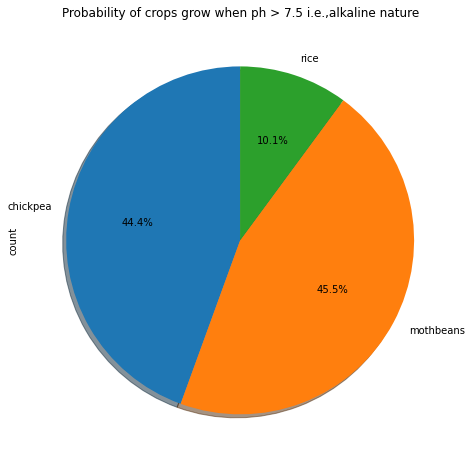

In [20]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(data.label[data.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

In [21]:
#Splitting the data into input and output
x = data.iloc[:,:-2]
y = data.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())

Input variables 
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Output Variable
 0    8
1    8
2    8
3    8
4    8
Name: Encoded_label, dtype: int32


In [22]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of Splitting :
x_train = (720, 7), x_test = (180, 7), y_train = (720,), y_test = (180,)


In [23]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

C:\Users\97517\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix : 



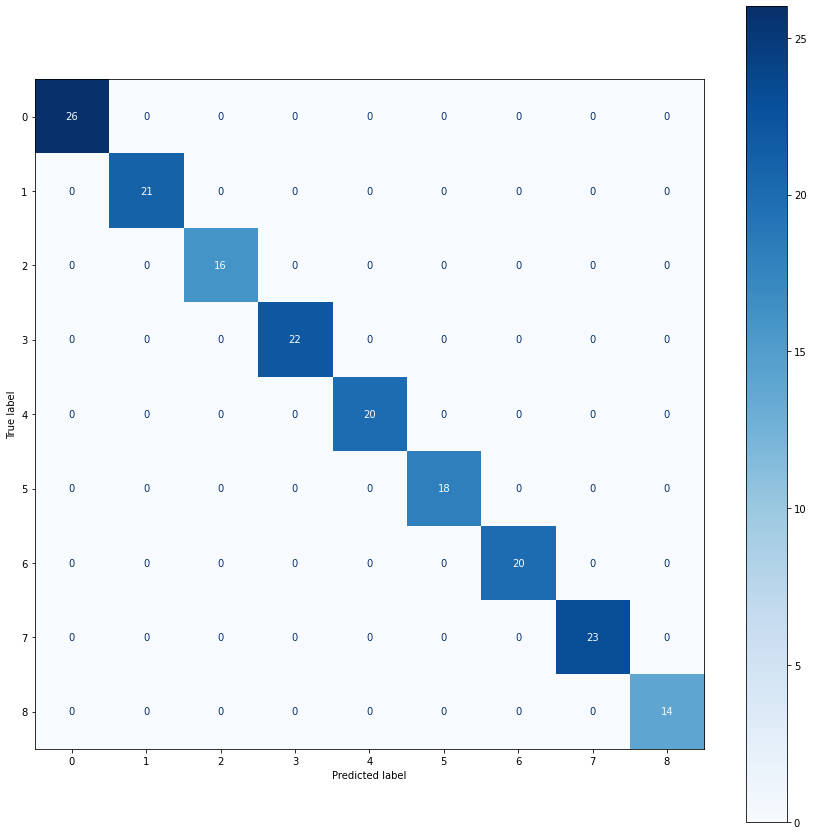

In [24]:
#Initializing the model
logis = LogisticRegression()
pred_logis = logis.fit(x_train,y_train).predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(logis,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [25]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_logis))
acc_logis = accuracy_score(y_test,pred_logis)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        14

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [26]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [27]:
#initializing the model and fitting for train data
rand = RandomForestClassifier()
pred_rand = rand.fit(x_train,y_train).predict(x_test)
acc_rand = accuracy_score(y_test,pred_rand)
acc_rand

1.0

In [28]:
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [29]:
#selecting parameters using GridSearchCV
param = {'n_estimators':range(10,50,10),
         'criterion':['gini'],
         'max_depth':range(1,20,2),
         'max_features':[1,2,3],
         'min_samples_leaf':range(1,10,2),
         'min_samples_split':range(1,40,10)}
grid_rand = GridSearchCV(rand,param,cv=5,n_jobs=-1,verbose=1)
grid_rand.fit(x_train,y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


C:\Users\97517\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan ...  1.  1.  1.]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 20, 2),
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 40, 10),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [30]:
print(grid_rand.best_params_)
print(grid_rand.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 40}
1.0


Confusion Matrix : 



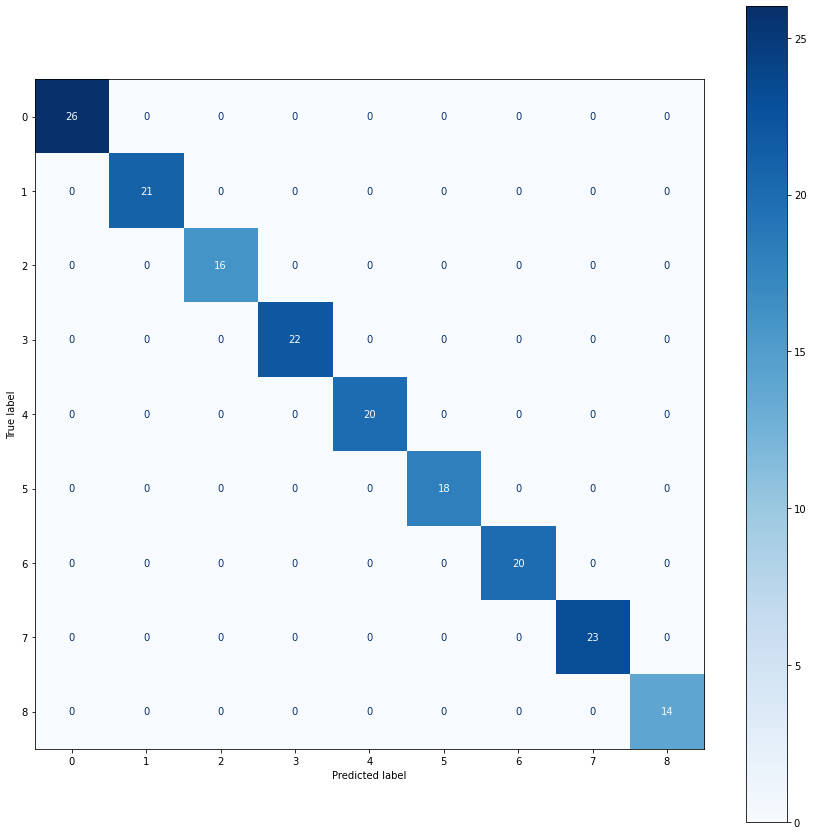

In [31]:
#predicting for test data and plotting confusion matrix
pred_rand = grid_rand.predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(grid_rand,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [32]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_rand))

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        14

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [33]:
#importing pickle file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [34]:
a = [[80,35,40,30,80,7.5,100]]

In [35]:
pickle_in = open('classifier.pkl','rb')
model = pickle.load(pickle_in)
pre = model.predict_proba(a)
pre = pd.DataFrame(data = np.round(pre.T*100,2), index=classes.index,columns=['predicted_values'])
pre

,predicted_values
label,
apple,1.54
banana,39.70
chickpea,0.17
kidneybeans,0.82
maize,11.37
mango,7.36
mothbeans,4.68
mungbean,12.09
rice,22.26


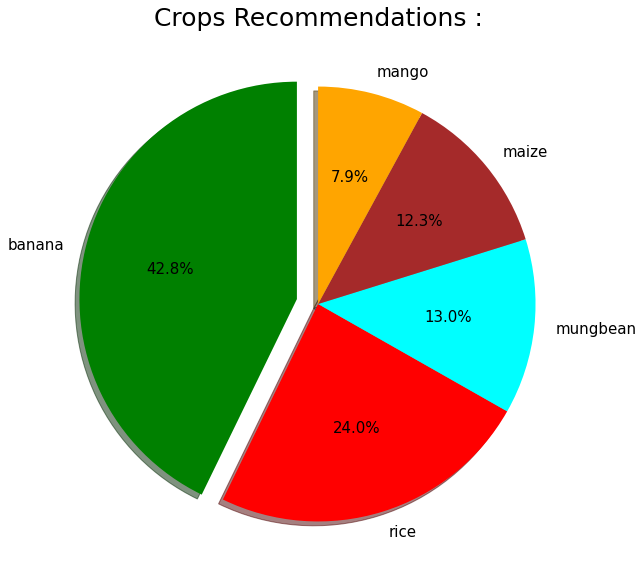

In [36]:
high = pre.predicted_values.nlargest(5)
plt.figure(figsize=(15,10))
plt.rcParams['font.size']=15
plt.title('Crops Recommendations :',fontdict={'fontsize': 25, 'fontweight': 'medium'})
plt.pie(x=high,labels=high.index,autopct='%1.1f%%',explode=(0.1, 0, 0, 0, 0),shadow=True,startangle=90,
        colors=['green','red','cyan','brown','orange'])

plt.show()